# SDS322E FINAL PROJECT - EXPLORATORY 

In [120]:
!pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../Desktop/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### Step 1: Clean data

In [121]:
#Remove NA
df.isnull().sum()
#Remove noise - by rounding numbers 
df[['Age','FAF', 'FCVC', 'TUE', 'CH2O', 'NCP']] = round(df[['Age','FAF', 'FCVC', 'TUE', 'CH2O', 'NCP']],0)

##### Step 2: Describe data 

In [122]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586058,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093305,26.191172,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.473343,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700499,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Step 3: Find correlation 

In [123]:
df['BMI'] = df['Weight']/(df['Height']**2)
df = df.drop(['Height','Weight'],axis=1)
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


<AxesSubplot:>

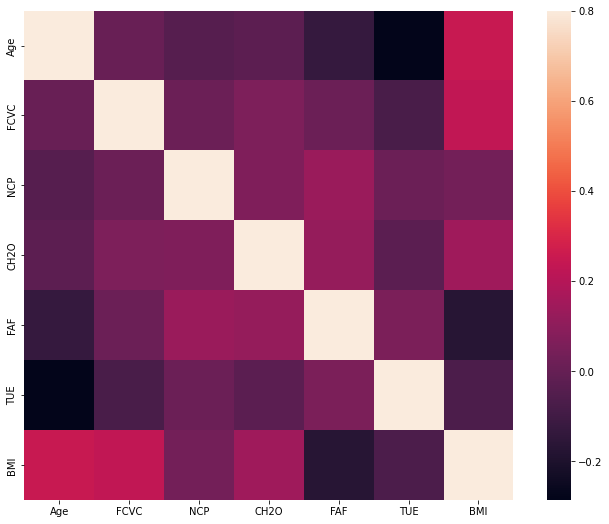

In [124]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# SDS322E FINAL PROJECT - ANALYSIS

In [125]:
import statsmodels.formula.api as smf
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


### BMI vs. Family History 

In [126]:
lm = lm = smf.ols('BMI ~ C(family_history_with_overweight)', data = df).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     643.5
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          4.03e-124
Time:                        00:58:46   Log-Likelihood:                -7106.5
No. Observations:                2111   AIC:                         1.422e+04
Df Residuals:                    2109   BIC:                         1.423e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   21.5005      0.357     60.144      0.000      20.799      22.202
C(family_history_with_overweight)[T.yes]    10.0287      0.395     25.367      0.000       9.253      10.804
==============================================================================
Omnibus:                       27.897   Durbin-Watson:                   0.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.020
Skew:                           0.006   Prob(JB):                     0.000201
Kurtosis:                       2.560   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### BMI vs. Frequency consumption of high-calories food

In [127]:
lm = lm = smf.ols('BMI ~ C(FAVC)', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     136.0
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.72e-30
Time:                        00:58:46   Log-Likelihood:                -7321.6
No. Observations:                2111   AIC:                         1.465e+04
Df Residuals:                    2109   BIC:                         1.466e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         24.2604      0.496     48.892      0.000      23.287      25.233
C(FAVC)[T.yes]     6.1540      0.528     11.660      0.000       5.119       7.189
==============================================================================
Omnibus:                      124.261   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.169
Skew:                           0.050   Prob(JB):                     5.72e-11
Kurtosis:                       2.275   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### BMI VS. Frequency of physical activities 

In [128]:
lm = lm = smf.ols('BMI ~ C(FAF)', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     23.45
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           6.32e-15
Time:                        00:58:47   Log-Likelihood:                -7352.9
No. Observations:                2111   AIC:                         1.471e+04
Df Residuals:                    2107   BIC:                         1.474e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        31.0088      0.294    105.504      0.000      30.432      31.585
C(FAF)[T.1.0]    -1.0723      0.408     -2.628      0.009      -1.873      -0.272
C(FAF)[T.2.0]    -2.5024      0.460     -5.438      0.000      -3.405      -1.600
C(FAF)[T.3.0]    -5.7915      0.780     -7.421      0.000      -7.322      -4.261
==============================================================================
Omnibus:                      115.984   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.159
Skew:                           0.155   Prob(JB):                     7.78e-12
Kurtosis:                       2.303   Cond. No.                         5.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Added other variables 

In [129]:
lm = lm = smf.ols('BMI ~ C(family_history_with_overweight) + C(FAVC) + C(FAF)', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     159.4
Date:                Fri, 10 Dec 2021   Prob (F-statistic):          5.85e-144
Time:                        00:58:47   Log-Likelihood:                -7048.6
No. Observations:                2111   AIC:                         1.411e+04
Df Residuals:                    2105   BIC:                         1.414e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   20.1732      0.551     36.628      0.000      19.093      21.253
C(family_history_with_overweight)[T.yes]     9.2656      0.394     23.515      0.000       8.493      10.038
C(FAVC)[T.yes]                               3.4552      0.477      7.243      0.000       2.520       4.391
C(FAF)[T.1.0]                               -1.0223      0.354     -2.891      0.004      -1.716      -0.329
C(FAF)[T.2.0]                               -2.0528      0.399     -5.141      0.000      -2.836      -1.270
C(FAF)[T.3.0]                               -4.3431      0.680     -6.384      0.000      -5.677      -3.009
==============================================================================
Omnibus:                        9.340   Durbin-Watson:                   0.544
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.131
Skew:                          -0.005   Prob(JB):                       0.0283
Kurtosis:                       2.715   Cond. No.                         8.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ------CLASSIFICATION STARTS HERE!!! -------

##### Change categorical variables into numerical variables 

In [130]:
df['Gender']=df['Gender'].apply(lambda x:1 if x == 'Female' else 0)
df['family_history_with_overweight']=df['family_history_with_overweight'].apply(lambda x:1 if x == 'yes' else 0)
df['FAVC']=df['FAVC'].apply(lambda x:1 if x == 'yes' else 0)
df['SMOKE']=df['SMOKE'].apply(lambda x:1 if x == 'yes' else 0)
df['SCC']=df['SCC'].apply(lambda x:1 if x == 'yes' else 0)
df['CAEC'] = pd.factorize(df['CAEC'])[0]
df['CALC'] = pd.factorize(df['CALC'])[0]
df['MTRANS'] = pd.factorize(df['MTRANS'])[0]

df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,21.0,1,0,2.0,3.0,0,0,2.0,0,0.0,1.0,0,0,Normal_Weight,24.386526
1,1,21.0,1,0,3.0,3.0,0,1,3.0,1,3.0,0.0,1,0,Normal_Weight,24.238227
2,0,23.0,1,0,2.0,3.0,0,0,2.0,0,2.0,1.0,2,0,Normal_Weight,23.765432
3,0,27.0,0,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,1,Overweight_Level_I,26.851852
4,0,22.0,0,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,0,Overweight_Level_II,28.342381


In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [132]:
# define data, X is the independent variables, Y is the dependent variable 
df1 = df.drop(['NObeyesdad','BMI'],axis=1)
X = df1
y = df['NObeyesdad']
acc=[]

In [133]:
#Split the trainning sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 1. SVM Classifier

In [134]:
###SVM Classifer 
from sklearn.datasets import make_classification
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)

###svm evaluation 
from sklearn.metrics import accuracy_score

# make prediction
y_pred = svm_model.predict(X_test) 

# compute accuracy and print it
accuracy1 = accuracy_score(y_test, y_pred) 
acc.append(accuracy1)
print("Accuracy : ", accuracy1)

Accuracy :  0.45454545454545453


## 2. kNN

Text(0, 0.5, 'Mean Error')

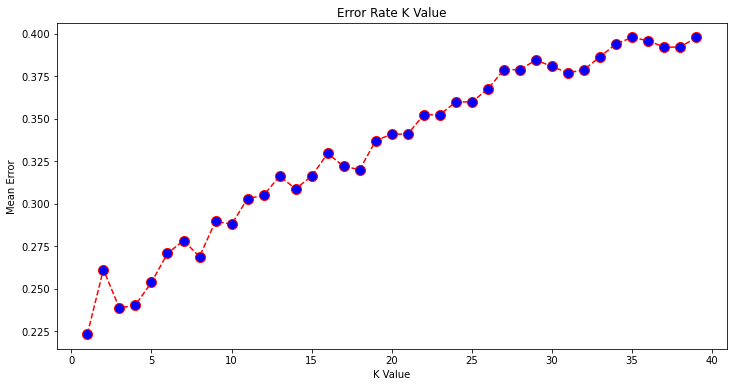

In [135]:
error = []

###knn classifer 
from sklearn.neighbors import KNeighborsClassifier

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [136]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

###knn evaluation 
y_pred1 = knn.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred1) 
acc.append(accuracy2)
print("Accuracy : ", accuracy2)

###knn visualization
#plt.scatter(X_train[:,0],X_train[:,1], c=y_)

Accuracy :  0.759469696969697


## 3. Decision Tree

In [137]:
###decision tree classifer 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

###decision tree evaluation
y_pred2 = clf.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred2) 
acc.append(accuracy3)
print("Accuracy : ", accuracy3)

Accuracy :  0.7443181818181818


## 4. Naive bayes

In [138]:
###naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)

###decision tree evaluation
y_pred3 = gnb.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred3) 
acc.append(accuracy4)
print("Accuracy : ", accuracy4)


Accuracy :  0.5037878787878788


## 5. Random Forest

In [139]:
###random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc = rfc.fit(X_train,y_train)
y_pred4 = rfc.predict(X_test)
accuracy5 = accuracy_score(y_test, y_pred4) 
acc.append(accuracy5)
print("Accuracy : ", accuracy5)

Accuracy :  0.5643939393939394


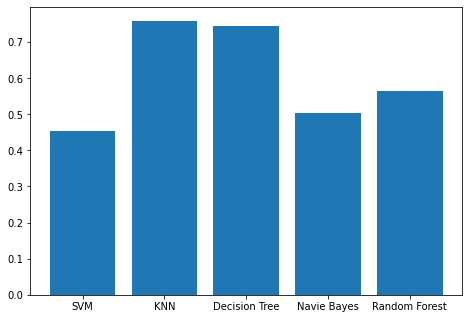

In [140]:
###plot accuracy 
classifiers = ['SVM', 'KNN', 'Decision Tree','Navie Bayes','Random Forest']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(classifiers,acc)
plt.show()

------ BY CATEGORIES -----------

In [141]:
df["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [142]:
Female = df[df['Gender']==1]
Female["NObeyesdad"].value_counts()

Obesity_Type_III       323
Insufficient_Weight    173
Obesity_Type_I         156
Overweight_Level_I     145
Normal_Weight          141
Overweight_Level_II    103
Obesity_Type_II          2
Name: NObeyesdad, dtype: int64

In [143]:
Male = df[df['Gender']==0]
Male["NObeyesdad"].value_counts()

Obesity_Type_II        295
Obesity_Type_I         195
Overweight_Level_II    187
Normal_Weight          146
Overweight_Level_I     145
Insufficient_Weight     99
Obesity_Type_III         1
Name: NObeyesdad, dtype: int64

TypeError: can only concatenate list (not "float") to list

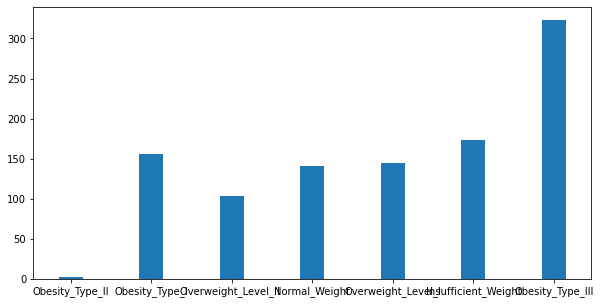

In [144]:
blue_bar = (2,156,103,141,145,173,323)
orange_bar = (295,195,187,146,145,99,1)


# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
ind = ["Obesity_Type_II", "Obesity_Type_I","Overweight_Level_II ","Normal_Weight","Overweight_Level_I","Insufficient_Weight","Obesity_Type_III"]
plt.bar(ind, blue_bar , width, label='Female')
plt.bar(ind + width, orange_bar, width, label='Male')

plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.title('Distribution of Obesity Level by Gender')

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## ----------------- MODEL EVALUATION -----------------

## 1. SVC

[[49 18  6  0  5  0  0]
 [27 18 11  9  3  1  0]
 [17  1 51 10  7  0  0]
 [ 1  0 10 55  7  0  0]
 [21  0  0  0 67  0  0]
 [18 15 16 15  4  0  0]
 [10  4 27 21  3  1  0]]


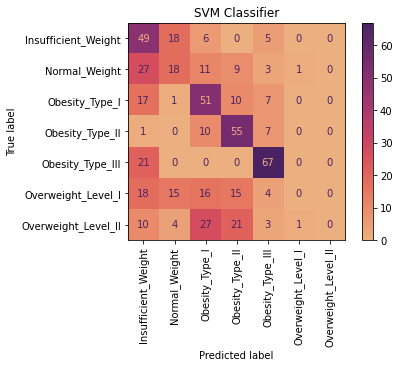

In [145]:
from sklearn.metrics import plot_confusion_matrix

# fit a SVM classifier using the training sub-set
classifier = SVC().fit(X_train, y_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation=90, cmap="flare")
plt.title("SVM Classifier")

print(disp.confusion_matrix)


## 2. KNN  

[[67  3  2  1  4  0  1]
 [15 20  7  8  6  8  5]
 [ 4  2 67  5  2  2  4]
 [ 0  0  0 69  0  0  4]
 [ 0  0  0  0 88  0  0]
 [ 3  4 12  5  5 35  4]
 [ 3  2  8 18  3  2 30]]


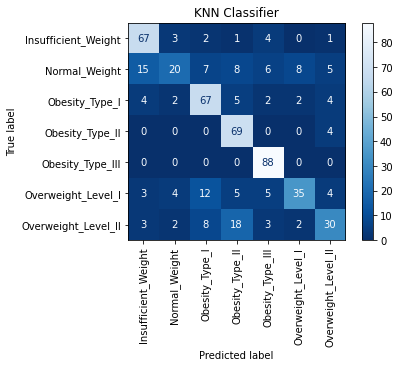

In [146]:
# fit a KNN classifier using the training sub-set
classifier = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation=90, cmap="Blues_r")
plt.title("KNN Classifier")

print(disp.confusion_matrix)


## 3. Decision Tree 

[[53 11 13  0  0  0  1]
 [14 24 16  0  3  6  6]
 [ 2  3 65  6  2  5  3]
 [ 0  0 11 55  0  0  7]
 [ 0  0  0  0 88  0  0]
 [ 6  8 29  1  2 20  2]
 [ 2  3 28 12  3  2 16]]


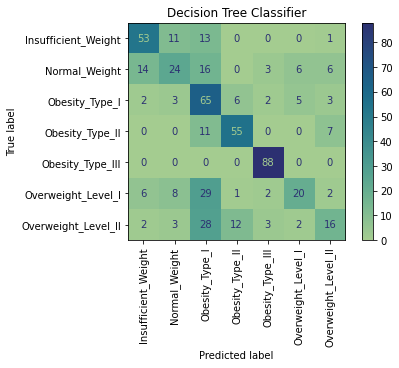

In [147]:
# fit a Decision Tree classifier using the training sub-set
classifier = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation=90, cmap="crest")
plt.title("Decision Tree Classifier")

print(disp.confusion_matrix)

## 4.  Naive Bayes 

[[75  1  0  2  0  0  0]
 [54  5  3  2  0  2  3]
 [42  1 21 20  2  0  0]
 [ 6  0  0 65  0  0  2]
 [ 0  1  0  0 87  0  0]
 [39  2 11  8  0  8  0]
 [29  1  8 22  0  1  5]]


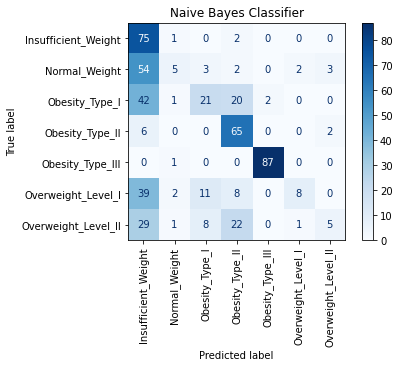

In [148]:
# fit a Naive Bayes classifier using the training sub-set
classifier = GaussianNB().fit(X_train, y_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation=90, cmap="Blues")
plt.title("Naive Bayes Classifier")

print(disp.confusion_matrix)

## 5.  Random Forest 

[[43 12 12  2  9  0  0]
 [12 33  4  3 14  0  3]
 [ 0  3 54 11 17  0  1]
 [ 0  0  1 72  0  0  0]
 [ 0  0  0  0 88  0  0]
 [ 7 10 26  5 13  6  1]
 [ 1  5 23 23 12  0  2]]


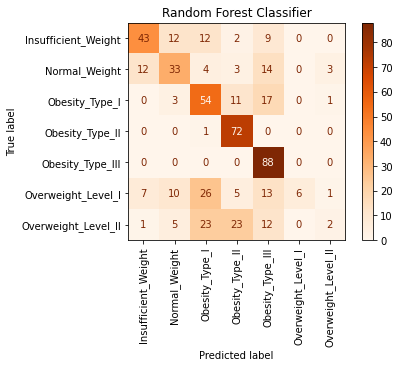

In [149]:
# fit a Random Forest classifier using the training sub-set
classifier = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

# plot the confusion matrix for the test sub-set
disp = plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation=90, cmap="Oranges")
plt.title("Random Forest Classifier")

print(disp.confusion_matrix)